# Linear regression

Difference between **regression** & **linear regression:**
- **Regression:** Is a type of supervised learning problem in which response is continous.
- **Linear regression:** Is a ML model that can be used for particular problems.


## Pros 
- It is ideal for forming reason
- Linear regression runs quickly and is ideal for big datasets
- No tunning required
- It's easy to interprete & understand
- It is well documented and understood.

## Cons:
- It's unlikely to produce the best predictive accuracy relative to other models as it assumes a linear relationship between the features & responce (many real world relations are non-linear).


## Forms of Linear regression

$y=\displaystyle \sum_{k=1}^n \beta_kx_k$
Where: 
- $y$ is the response
- $\beta_0$ is the coefficient
- $\beta_k$ is the model coefficient of the $\mathrm{k^{th}}$ feature ($x_k$)

The $\beta$-values are derived during model fitting process, using the least-squares criteria.

In [80]:
import pandas as pd
import seaborn as sb
import matplotlib.pylab as plt
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

In [81]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
Radio         200 non-null float64
Newspaper     200 non-null float64
Sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


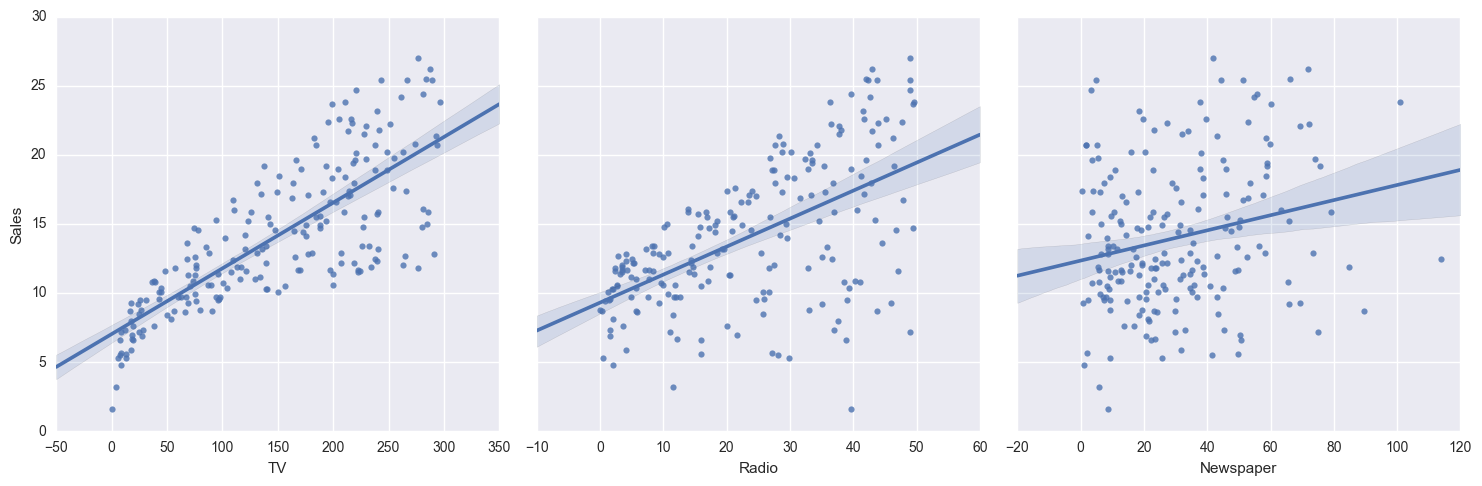

In [82]:
sb.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars=['Sales'],size=5,kind='reg')
plt.show()

** Firstly we need to define the feature metrix ($X$) and the response vector $y$.**

In [83]:
Featurs_cols = ['TV', 'Radio', 'Newspaper'] # feature list
X = data[Featurs_cols] # extract feature metrix
y = data['Sales']      # response vector

#Split data into training & test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=4)

## Linear regression in Sci-kit lean

**Note: the model is learning coefficients & intercept for best fit.**

In [84]:
LinReg = LinearRegression()
LinReg.fit(X_train,y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## The intercept & coefficients

In [85]:
#pair the feature names with their respective model coefficients
zip(Featurs_cols,LinReg.coef_)

[('TV', 0.045850772657654131),
 ('Radio', 0.17764264455697568),
 ('Newspaper', 0.0024766924596389579)]

In [86]:
# predictions
y_pred = LinReg.predict(X_test)

## Different errors

$\mathrm{MAE} = \frac{1}{n} \sum{ | \left(y_i -\bar{y} \right) |} \hspace{2cm} $  $\mathrm{MSE} = \frac{1}{n} \sum{  \left(y_i -\bar{y} \right) ^2} \hspace{2cm}$ $\mathrm{RMSE} = \sqrt{\frac{1}{n} \sum{  \left(y_i -\bar{y} \right) ^2}}$

** Note: The best model/model to use is the one that minimises the error.**

In [87]:
# The error between predicted and the actual values.
round(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),2)

1.45

## Right a function for liner regression model

In [89]:
def linreg(featurs_cols,response,X_pred):
    global X_test, y_test
    X = data[featurs_cols] # extract feature metrix
    y = data[response]
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=4)
    LinReg = LinearRegression()
    LinReg.fit(X_train,y_train) 
    y_pred = LinReg.predict(X_pred)
    return y_pred
    

#### Test the model using all the features

In [64]:
y_pred=linreg(['TV','Radio','Newspaper'],'Sales',X_test)
rmse=round(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),2)
rmse

1.45

#### Test the model combination of certain features

- Run each code cell twice: to update X_test.

In [97]:

y_pred=linreg(['TV','Radio'],'Sales',X_test)
rmse=round(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),2)
rmse

1.44

In [99]:
y_pred=linreg(['TV','Newspaper'],'Sales',X_test)
rmse=round(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),2)
rmse

3.38

In [101]:
y_pred=linreg(['Radio','Newspaper'],'Sales',X_test)
rmse=round(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),2)
rmse

4.09

## Conclusion

The best model is the one that uses two features (i.e. TV & Radio).  This is also evident on the graphs we have above as both TV vs Sales & Radio vs Sales plot show some linearity, but that is not the case with the Newspaper vs Sales plot.